# Análise dos Pares
Após identificar os pares em Cointegration.ipynb, é hora de analisar quais os melhores estão sinalizando entrada

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statistics
import matplotlib.pyplot as plt
%run Cointegration.py

# Funtions

In [3]:
def subshow(data, y_symbol, x_symbol, ax, period=250, title=''):
    y, x = getvalues_by_period(data[y_symbol], data[x_symbol], period)
    model= model_ols(y, x)
    result = zscore(model.resid)
    std = result.std()
    result.plot(ax=ax)
    #ax.plot(result)
    if(title == ''):
        ax.set_title('{} / {}'.format(y_symbol, x_symbol))
    else:
        ax.set_title(title)
    ax.margins(0.1)
    ax.set_xlabel('')

    ax.axhline(0, color='black',label='mean')
    ax.axhline(2*std, color='red', linestyle='--', linewidth=2)
    ax.axhline(-2*std, color='green', linestyle='--', linewidth=2)

In [4]:
path_data_cart = 'datasets/data_cart.csv'

In [5]:
data = pd.read_csv(path_data_cart, index_col=0)
pairs = pd.read_csv('datasets/cointegrated_pairs.csv')

print('{} to {}'.format(data.index[0], data.index[-1]))
print('data: {}'.format(data.shape))
print('pairs: {}'.format(pairs.shape))

08/04/2019 to 22/06/2020
data: (300, 71)
pairs: (287, 13)


Procura pares que estão quase no ponto de entrada 95% de distância da média e 5% próximo da zona -2 e +2

In [5]:
signal = pairs.loc[(pairs['Signal'] >= 1)].copy()
signal.reset_index(drop=True, inplace=True)
signal.shape

(13, 13)

In [6]:
signal = signal.loc[(signal['PeriodQt'] > 2)].sort_values(by=['HalfLife'], ascending=True).copy()
signal.reset_index(drop=True, inplace=True)
signal

,Period,Dependente,Independente,Dickey-Fuller,ADF,Beta,HalfLife,Hurst,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,AZUL4,BBSE3,0.000441,99,3.631409,5,0.236266,0.961676,1.192895,Long/Short,9,"100,120,140,160,180,200,220,240,250"
1,250,CYRE3,MULT3,0.024289,95,1.218074,8,0.343315,0.957361,1.543410,Short/Long,5,"180,200,220,240,250"
2,250,RENT3,SBSP3,0.002681,99,0.845364,8,0.181043,0.903639,1.331198,Long/Short,9,"100,120,140,160,180,200,220,240,250"
3,250,HYPE3,MULT3,0.029438,95,0.437446,9,0.280770,0.695239,1.009578,Short/Long,7,"100,160,180,200,220,240,250"
4,250,HYPE3,TOTS3,0.031532,95,0.114437,9,0.277519,0.638732,1.230609,Short/Long,4,"200,220,240,250"
5,250,BBDC3,BBSE3,0.025048,95,1.350682,10,0.279620,0.942915,1.053096,Long/Short,9,"100,120,140,160,180,200,220,240,250"
6,250,BBSE3,EMBR3,0.041092,95,0.877712,10,0.269978,0.931250,1.093140,Short/Long,5,"180,200,220,240,250"
7,250,FLRY3,SBSP3,0.049784,90,0.420897,12,0.289002,0.868857,1.121460,Long/Short,4,"180,200,220,250"


In [7]:
#ignal.iloc[[0, 6, 11]].to_csv('datasets/oper/22062020.csv', index=False)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


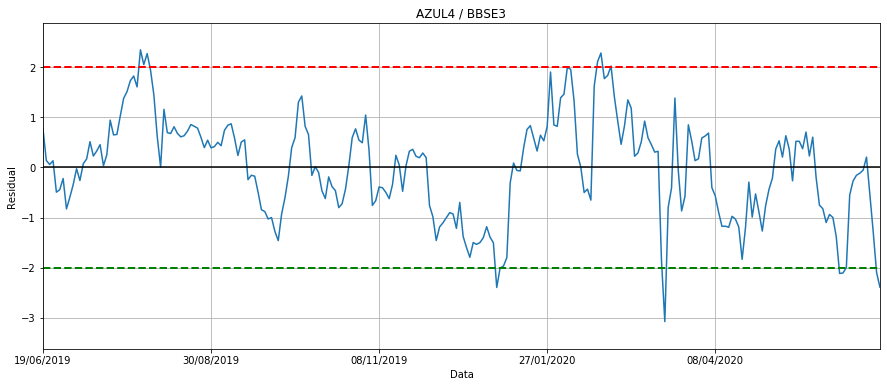

In [8]:
show(data, 'AZUL4', 'BBSE3')

### Plota todos os sinais

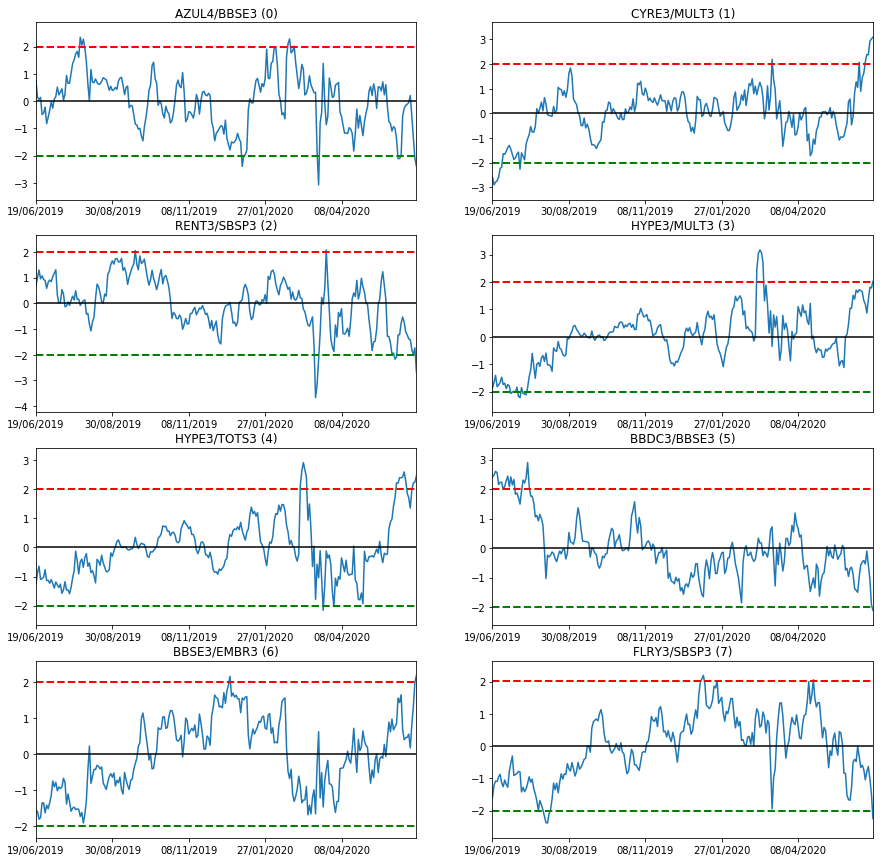

In [11]:
fig2, axes = plt.subplots(nrows=int((signal.shape[0]/2)), ncols=2, figsize=(15, 15))
for i, ax in enumerate(axes.flatten()):
    row = signal.iloc[i]
    y_symbol = row['Dependente']
    x_symbol = row['Independente']
    
    subshow(data, y_symbol, x_symbol, ax, title='{}/{} ({})'.format(y_symbol, x_symbol, i))
    #plt.tight_layout()

Visualiza todos os gráficos de df signal

In [158]:
"""clear_folder('graphic')
for i, j in signal.iterrows():
    y_symbol = j['Dependente']
    x_symbol = j['Independente']
    
    show(data, y_symbol, x_symbol,padronizar=True, savefig='graphic/{}-{}.jpg'.format(y_symbol,x_symbol))"""

"clear_folder('graphic')\nfor i, j in signal.iterrows():\n    y_symbol = j['Dependente']\n    x_symbol = j['Independente']\n    \n    show(data, y_symbol, x_symbol,padronizar=True, savefig='graphic/{}-{}.jpg'.format(y_symbol,x_symbol))"

#### Verifica movimento do par nos últimos 8 dias

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


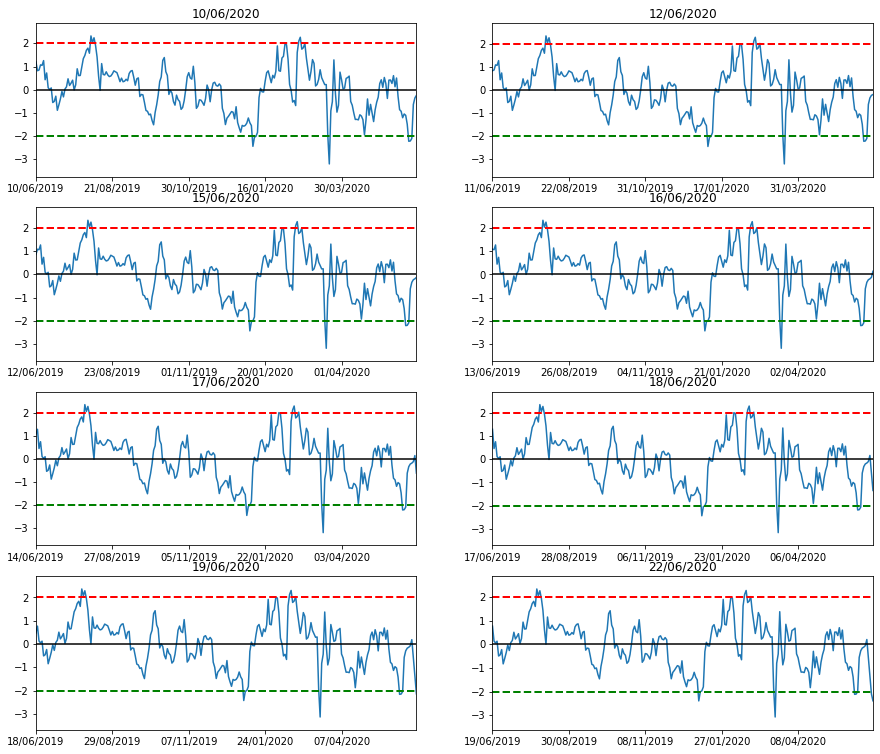

In [48]:
y_symbol = 'AZUL4'
x_symbol = 'BBSE3'

index = data.shape[0]-8
fig2, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 13))
for i, ax in enumerate(axes.flatten()):
    index+=1
    last_data = data.iloc[:index].copy()
    label = last_data.index[-1]
    subshow(last_data, y_symbol, x_symbol, ax, title=label)
    #plt.tight_layout()

In [276]:
test = data.iloc[data.shape[0]-8:][['AZUL4', 'BBSE3']]

In [ ]:
#test.to_excel("datasets/excel.xlsx")

# Análise da operação aberta

In [17]:
oper_22062020 = pd.read_csv('datasets/oper/22062020.csv')
oper_22062020

,Period,Dependente,Independente,Dickey-Fuller,ADF,Beta,HalfLife,Hurst,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,AZUL4,BBSE3,0.000273,99,3.624776,5,0.239819,0.962281,1.066906,Long/Short,9,"100,120,140,160,180,200,220,240,250"
1,250,BBDC3,SANB11,0.019923,95,0.736223,8,0.297370,0.987493,1.004259,Long/Short,4,"200,220,240,250"
2,250,ENGI11,MULT3,0.027359,95,0.939998,11,0.399600,0.862502,1.045645,Short/Long,3,"220,240,250"


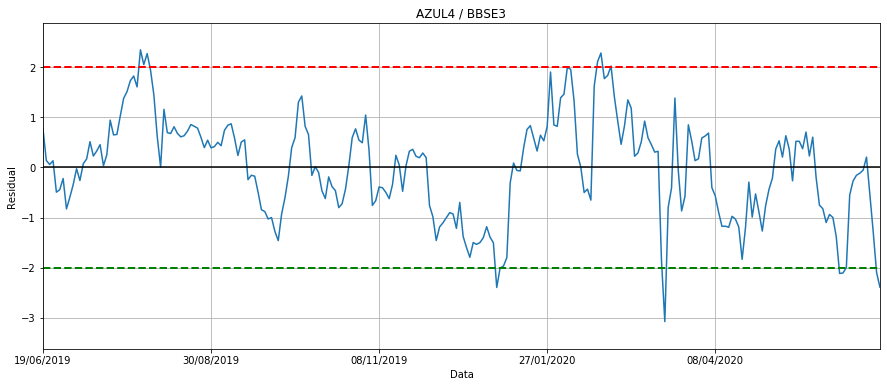

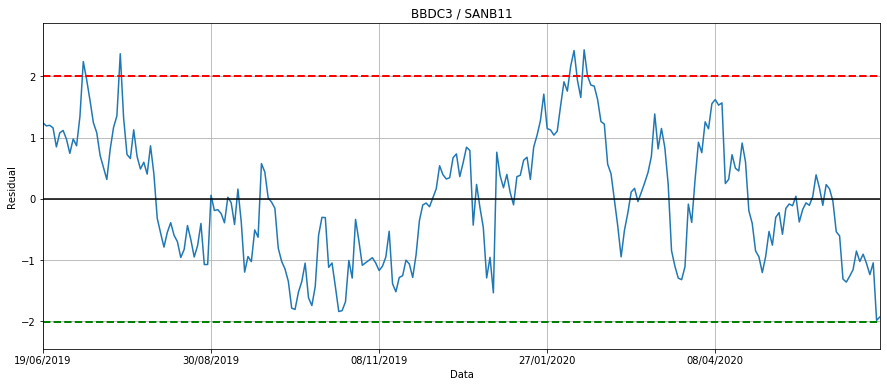

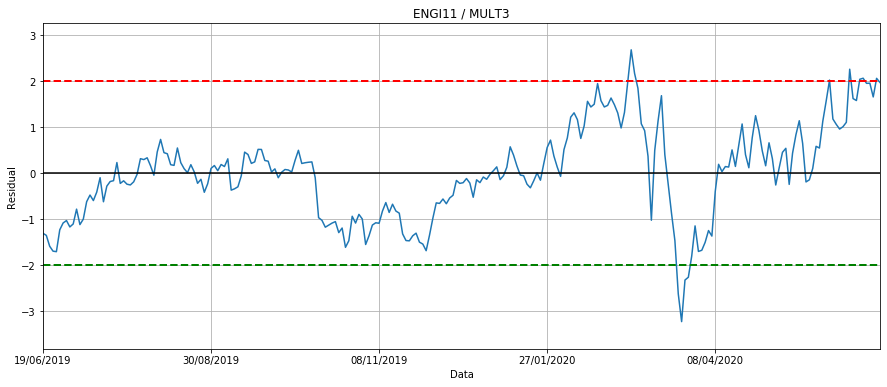

In [18]:
show(data, 'AZUL4', 'BBSE3')
show(data, 'BBDC3', 'SANB11')
show(data, 'ENGI11', 'MULT3')

In [20]:
result = model_ols(data['AZUL4'], data['BBSE3'])
result.params

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const   -67.771918
BBSE3     3.484070
dtype: float64

In [23]:
dfres = pd.DataFrame()
dfres['resid'] = result.resid

In [24]:
result.resid

Data
08/04/2019     5.396942
09/04/2019     7.013180
10/04/2019     7.731269
11/04/2019     7.401968
12/04/2019     6.058401
                ...    
16/06/2020    -0.746511
17/06/2020    -3.991537
18/06/2020    -7.224908
19/06/2020   -10.734456
22/06/2020   -12.043819
Length: 300, dtype: float64

In [45]:
dfres['mean'] = result.resid.rolling(window=21, center=False).mean()
dfres.fillna(value=0, inplace=True)

In [46]:
dfres['%'] = dfres['mean'] / dfres['resid']

In [47]:
dfres

,resid,mean,%
Data,,,
08/04/2019,5.396942,0.000000,0.000000
09/04/2019,7.013180,0.000000,0.000000
10/04/2019,7.731269,0.000000,0.000000
11/04/2019,7.401968,0.000000,0.000000
12/04/2019,6.058401,0.000000,0.000000
...,...,...,...
16/06/2020,-0.746511,-4.060550,5.439370
17/06/2020,-3.991537,-4.264255,1.068324
18/06/2020,-7.224908,-4.590011,0.635304


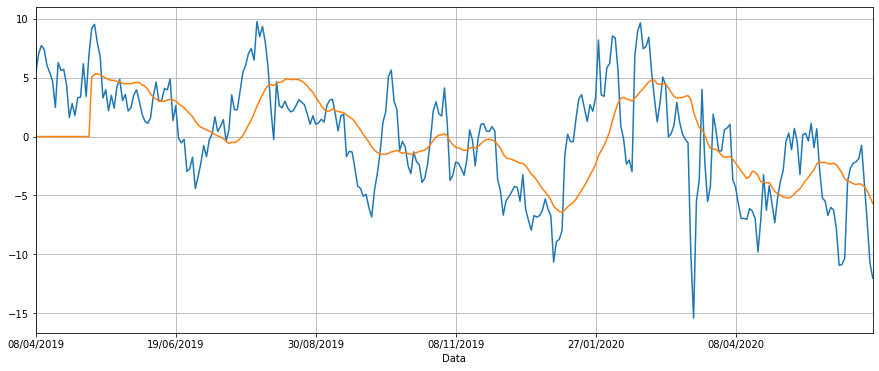

In [61]:
plt.figure(figsize=(15, 6))
dfres['resid'].plot()
dfres['mean'].plot()
plt.grid(True)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


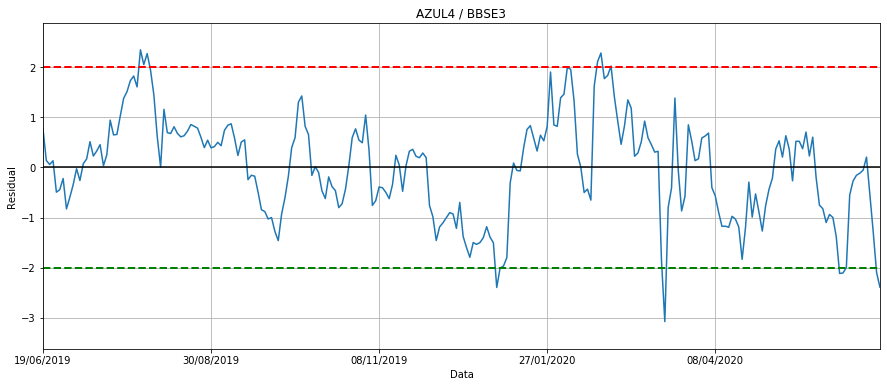

In [59]:
show(data, 'AZUL4', 'BBSE3')

In [24]:
x = pd.Series(np.arange(1, 10))
x

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int32

In [25]:
x.shift(1)

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
dtype: float64

In [27]:
np.roll(x, 1)

array([9, 1, 2, 3, 4, 5, 6, 7, 8])

In [29]:
#test.to_excel("datasets/excel.xlsx")